**K-means Clustering**
K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct clusters based on their similarities. It assigns each data point to the nearest cluster centroid and iteratively updates the centroids to minimize the within-cluster sum of squared distances.

**Silhouette method**
The Silhouette method measures how well each data point fits within its assigned cluster compared to neighboring clusters. The Silhouette score ranges from -1 to 1, with higher scores indicating better-defined and well-separated clusters.

**The Calinski-Harabasz Index**
The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, considers both the within-cluster dispersion and the between-cluster dispersion to evaluate the clustering, where a higher Calinski-Harabasz Index indicates better clustering, as it suggests that the clusters are well-separated (high between-cluster variance) and compact (low within-cluster variance).

both these methods are useful for determining the optimal number of clusters (k) in a dataset, where they measure rhe clustering quality, such that the Silhouette Score focuses on the fit of individual data points to their assigned clusters, while the Calinski-Harabasz Index evaluates the overall quality of the clustering solution based on the balance of within-cluster and between-cluster variances.




In [27]:
# Evaluate K-means with different values of K
k_values = range(2, 11)  # Test K from 2 to 10 that’s mean more than 3 times
silhouette_scores = []
calinski_harabasz_scores = []
wss_values = []  # To hold Within-cluster Sum of Squares
# Calculate silhouette score and Calinski-Harabasz score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    ch_score = calinski_harabasz_score(scaled_df, kmeans.labels_)
    print(f"Sillhoutte Score for K={k}: {silhouette_avg:.2f}")
    print(f"calinski harabasz score K={k}: {ch_score:.2f}")


    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(ch_score)
    wss_values.append(kmeans.inertia_)

Sillhoutte Score for K=2: 0.13
calinski harabasz score K=2: 433.69
Sillhoutte Score for K=3: 0.09
calinski harabasz score K=3: 363.46
Sillhoutte Score for K=4: 0.09
calinski harabasz score K=4: 370.12
Sillhoutte Score for K=5: 0.10
calinski harabasz score K=5: 317.71
Sillhoutte Score for K=6: 0.10
calinski harabasz score K=6: 293.76
Sillhoutte Score for K=7: 0.08
calinski harabasz score K=7: 249.23
Sillhoutte Score for K=8: 0.07
calinski harabasz score K=8: 228.19
Sillhoutte Score for K=9: 0.07
calinski harabasz score K=9: 216.28
Sillhoutte Score for K=10: 0.07
calinski harabasz score K=10: 199.75


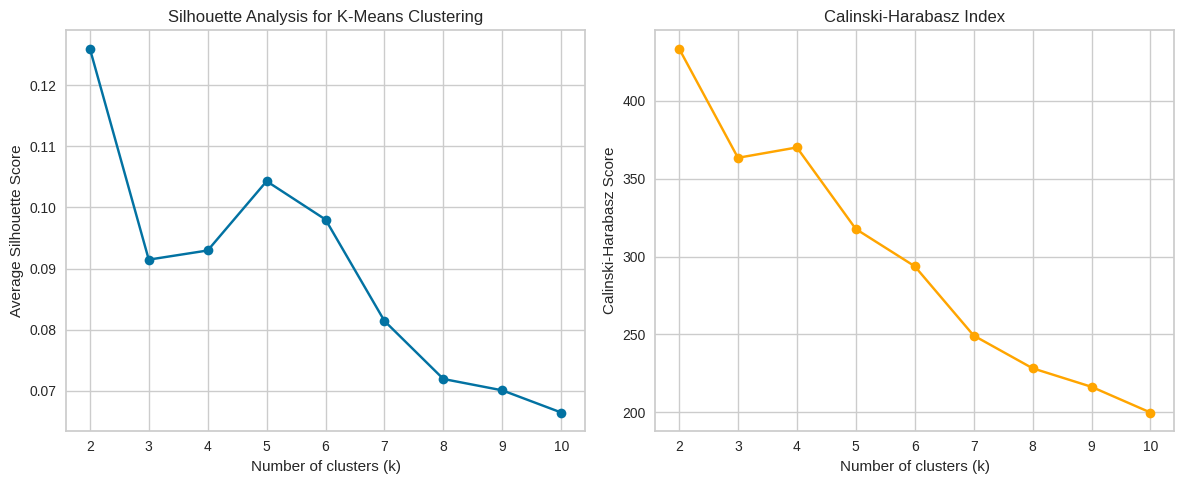

In [28]:
# Plot the results
plt.figure(figsize=(12, 5))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')

# Calinski-Harabasz Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

The highest average Silhouette score is 0.12599557537154973 with k=2.

The second highest average Silhouette score is 0.1042966445238377 with k=5.

The highest Calinski-Harabasz score is 433.6893749551916 with k=2.

The second highest Calinski-Harabasz is 370.1212260951766 with k=4.

as you can see above We found that the optimal number of clusters (k) maximizing the average Silhouette coefficient and Calinski-Harabasz score is 2.

**The Elbow method**
The Elbow method is a technique used to determine the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (inertia) as a function of the number of clusters. The inertia measures the compactness of the clusters, and the Elbow point represents the number of clusters where adding more clusters does not significantly reduce the inertia. The Elbow method helps in finding a balance between having a low inertia and avoiding overfitting.

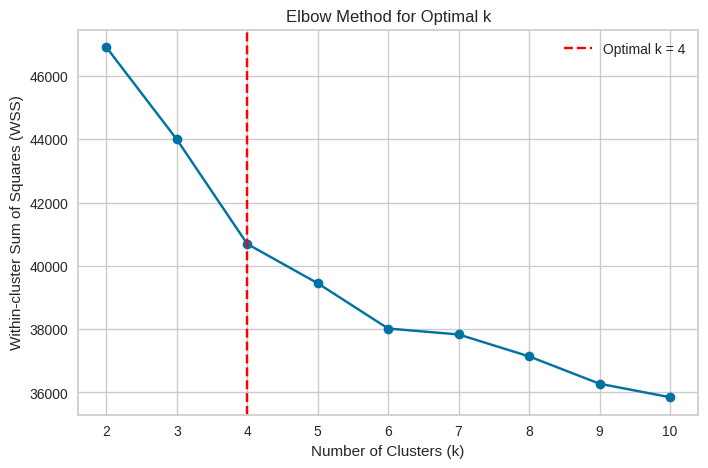

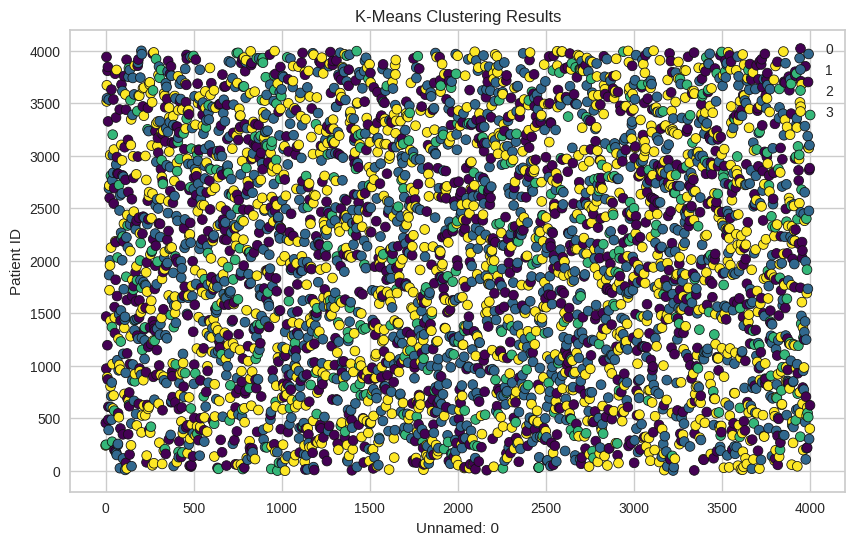

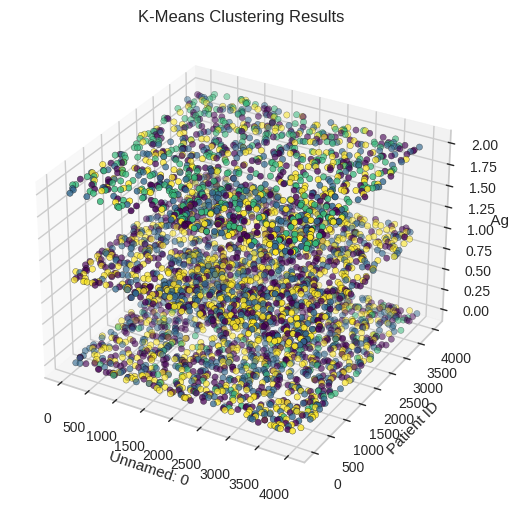

In [23]:
# Elbow Method for optimal K
plt.figure(figsize=(8, 5))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.axvline(x=4, linestyle='--', color='red', label='Optimal k = 4')
plt.legend()
plt.show()

# Fit KMeans with the optimal K (k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize clustering using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', edgecolor='k')
plt.title("K-Means Clustering Results")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()


# Visualize clustering using a scatter plot using 3D (for more clarification)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['Cluster'], cmap='viridis', edgecolor='k')

# Set labels and title
ax.set_title("K-Means Clustering Results")
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

# Add legend
ax.legend()

# Show the plot
plt.show()

The Elbow Method analysis of the WSS curve points to 4 as the optimal number of clusters for this dataset, as this is the value where the curve starts to plateau and exhibit diminishing returns from adding more clusters.

In [24]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-3.58436717e-02  6.01612802e-03 -1.27231635e-03 -1.51578667e+00
  -1.57632283e-02  4.00246276e-03 -2.93915089e-02  1.86235034e-02
  -2.58460570e-02 -2.07502703e-02 -7.88018415e-01  1.20408800e-02
   1.94311610e-02]
 [ 1.56004211e-02 -2.61842960e-03  5.53756633e-04  6.59723442e-01
   6.86070896e-03 -1.74201196e-03  1.27922140e-02 -8.10560086e-03
   1.12491091e-02  9.03124431e-03  3.42973210e-01 -5.24061265e-03
  -8.45712174e-03]]

Cluster Labels:
[1 1 0 ... 1 1 0]


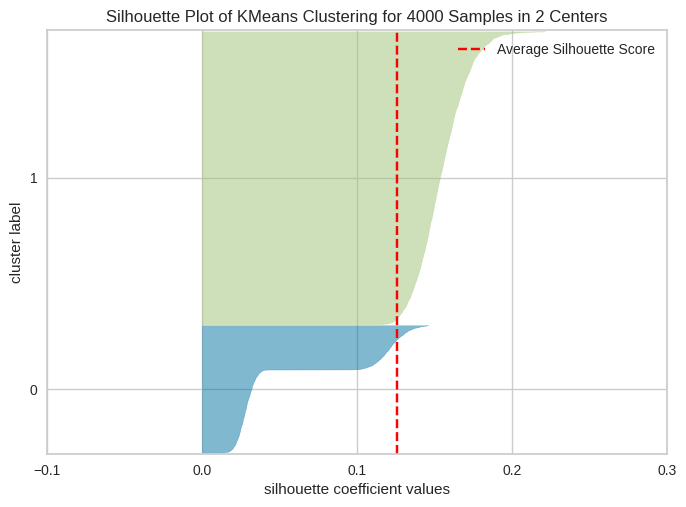

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()